# Prediction

In [1]:
from config import config
config = config.Configuration()

In [2]:
if 0: 
    # run previous notebooks if necessary
    if not "run_prev_notebooks" in locals(): # use case: this notebook
        run_prev_notebooks = False
        %run "1_data_preparation.ipynb"

In [3]:
from core.losses import tversky, accuracy, dice_coef, dice_loss, specificity, sensitivity
from core.optimizers import adaDelta
OPTIMIZER = adaDelta
LOSS = tversky

In [4]:
import keras
from keras.models import load_model
# check if model_path is already defined. This is the case when you run the pipeline and not this notebook alone
if not "model_path" in locals(): model_path = config.filepath_model
model = load_model(model_path, custom_objects={'tversky': LOSS, 
                                               'dice_coef': dice_coef, 
                                               'dice_loss': dice_loss, 
                                               'accuracy': accuracy , 
                                               'specificity': specificity, 
                                               'sensitivity': sensitivity}, 
                                               compile=False)

In [5]:
import numpy as np
from sklearn.metrics import mean_squared_error
# predict the target on test data 
predict_test = model.predict(X_test)
# Root Mean Squared Error on train and test date
flattened_test = np.reshape(y_test,    np.prod(y_test.shape))
flattened_pred = np.reshape(predict_test, np.prod(predict_test.shape))
print('RMSE on test data: ', mean_squared_error(flattened_test, flattened_pred))

RMSE on test data:  1.0121194


In [6]:
x=0

In [58]:
def scale(array):
    return [(num*255).astype(np.uint8) for num in array]

In [65]:
from numpy import ndarray
def show_rounded(idx):
    rounded = [ndarray.round(num, 0) for num in predict_test]
    show_rasterio(predict_test[idx])

In [68]:
from rasterio.plot import show as show_rasterio
from patch_creation import show
def show_img(idx):
    print("Original")
    show(scale(X_test)[idx], scale(y_test)[idx])
    print("Prediction")
    # print("Rasterio")
    # show_rasterio(predict_test[idx])
    # print("Matplotlib")
    plt.imshow(scale(predict_test[idx]))
    plt.show()

Original


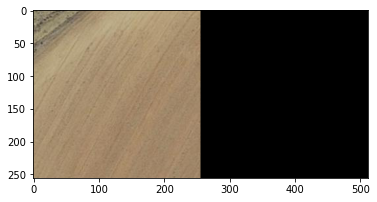

Prediction


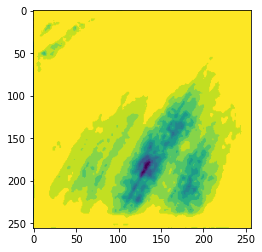

Original


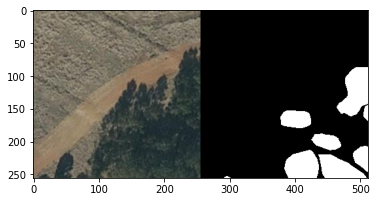

Prediction


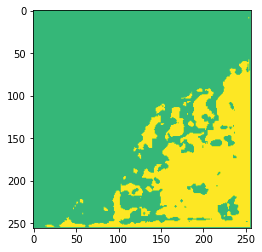

Original


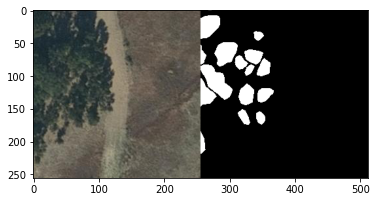

Prediction


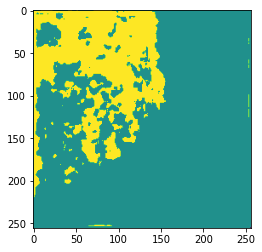

In [70]:
for i in [22,33, 35]:
    show_img(i)